# 2020 Homeless Count Data by Census Tract
### Source: Economic Roundtable https://economicrt.org/publication/los-angeles-county-homeless-count-data-library/

This data was sent to me by Tiffany when I was asking for houseless count data by census tract. Thanks Tiffany!

In [69]:
#Importing the excel spreadsheet as a dataframe

import pandas as pd

df = pd.read_excel('2020-Street-Count-Results-by-Census-Tract-trimmed.xlsx')

In [70]:
# Taking a look at which are the relevant columns. Looks like 'FID_LA_Cou' is the count data
df.head()

,FID_LA_Cou,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,Non-CoC Flag,Non-CoC Place,NAME10,NAMELSAD10,CT_NAME,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,FID_Servic,SPA_NAME,SPA_2012,LACityCD12,LA_CoSupDist11
0,1463,6,37,101110,6037101110,1,Great LA Continuum of Care,1011.10,Census Tract 1011.10,Tujunga Canyon Blvd,G5020,S,1142405,0,34.259474,-118.292987,1,SPA 2: San Fernando,2,7.0,5
1,671,6,37,101122,6037101122,1,Great LA Continuum of Care,1011.22,Census Tract 1011.22,NaN,G5020,S,2644043,0,34.267721,-118.290147,1,SPA 2: San Fernando,2,7.0,5
2,1445,6,37,101210,6037101210,1,Great LA Continuum of Care,1012.10,Census Tract 1012.10,Little Landers Park,G5020,S,650691,0,34.252972,-118.290731,1,SPA 2: San Fernando,2,7.0,5
3,1703,6,37,101220,6037101220,1,Great LA Continuum of Care,1012.20,Census Tract 1012.20,Haines Canyon Ave,G5020,S,698967,0,34.251609,-118.281632,1,SPA 2: San Fernando,2,7.0,5
4,1578,6,37,101300,6037101300,1,Great LA Continuum of Care,1013.00,Census Tract 1013,Mt. Glesson Ave,G5020,S,2580401,0,34.248778,-118.270999,1,SPA 2: San Fernando,2,7.0,5


In [71]:
# We've got lat long so let's turn this into a GDF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FID_LA_Cou      2344 non-null   int64  
 1   STATEFP10       2344 non-null   int64  
 2   COUNTYFP10      2344 non-null   int64  
 3   TRACTCE10       2344 non-null   int64  
 4   GEOID10         2344 non-null   int64  
 5   Non-CoC Flag    2344 non-null   int64  
 6   Non-CoC Place   2344 non-null   object 
 7   NAME10          2344 non-null   float64
 8   NAMELSAD10      2344 non-null   object 
 9   CT_NAME         1695 non-null   object 
 10  MTFCC10         2344 non-null   object 
 11  FUNCSTAT10      2344 non-null   object 
 12  ALAND10         2344 non-null   int64  
 13  AWATER10        2344 non-null   int64  
 14  INTPTLAT10      2344 non-null   float64
 15  INTPTLON10      2344 non-null   float64
 16  FID_Servic      2344 non-null   int64  
 17  SPA_NAME        2344 non-null   o

In [72]:
# Converting to GDF with the appropriate columns as lat and long
import geopandas as gpd
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.INTPTLON10, df.INTPTLAT10))

In [73]:
# Quick look, seems to have worked
gdf

,FID_LA_Cou,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,Non-CoC Flag,Non-CoC Place,NAME10,NAMELSAD10,CT_NAME,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,FID_Servic,SPA_NAME,SPA_2012,LACityCD12,LA_CoSupDist11,geometry
0,1463,6,37,101110,6037101110,1,Great LA Continuum of Care,1011.10,Census Tract 1011.10,Tujunga Canyon Blvd,G5020,S,1142405,0,34.259474,-118.292987,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29299 34.25947)
1,671,6,37,101122,6037101122,1,Great LA Continuum of Care,1011.22,Census Tract 1011.22,NaN,G5020,S,2644043,0,34.267721,-118.290147,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29015 34.26772)
2,1445,6,37,101210,6037101210,1,Great LA Continuum of Care,1012.10,Census Tract 1012.10,Little Landers Park,G5020,S,650691,0,34.252972,-118.290731,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29073 34.25297)
3,1703,6,37,101220,6037101220,1,Great LA Continuum of Care,1012.20,Census Tract 1012.20,Haines Canyon Ave,G5020,S,698967,0,34.251609,-118.281632,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.28163 34.25161)
4,1578,6,37,101300,6037101300,1,Great LA Continuum of Care,1013.00,Census Tract 1013,Mt. Glesson Ave,G5020,S,2580401,0,34.248778,-118.270999,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.27100 34.24878)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2046,6,37,577602,6037577602,2,"Long Beach city, CA",5776.02,Census Tract 5776.02,Bixby Village Golf Course,G5020,S,1324998,69272,33.770058,-118.112671,7,SPA 8: South Bay,8,NaN,4,POINT (-118.11267 33.77006)
2340,2044,6,37,577603,6037577603,2,"Long Beach city, CA",5776.03,Census Tract 5776.03,Marine Stadium Acueducto,G5020,S,2682520,298384,33.769113,-118.127319,7,SPA 8: South Bay,8,NaN,4,POINT (-118.12732 33.76911)
2341,2159,6,37,577604,6037577604,2,"Long Beach city, CA",5776.04,Census Tract 5776.04,NaN,G5020,S,853432,645395,33.755750,-118.110085,7,SPA 8: South Bay,8,NaN,4,POINT (-118.11009 33.75575)
2342,1695,6,37,980018,6037980018,2,"Long Beach city, CA",9800.18,Census Tract 9800.18,NaN,G5020,S,7372384,21307,33.815252,-118.153909,7,SPA 8: South Bay,8,NaN,4,POINT (-118.15391 33.81525)


<AxesSubplot:>

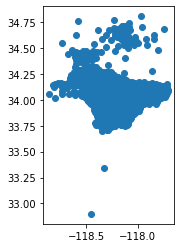

In [74]:
# Quick plot to make sure it looks like LA County, sure enough it does
gdf.plot()

## Bringing in tract polygon data by using 2020 ACS total pop table's geometry column

In [75]:
# Because the houseless count data is only point data, but has the census tracts, I wanted to bring in tract data
# Census API gave me a "Max retries exceeded" error, so just downloaded the JSON
acs_gdf = gpd.read_file('acs2020_5yr_B01003_14000US06037463000.geojson')
acs_gdf

,geoid,name,B01003001,"B01003001, Error",geometry
0,05000US06037,"Los Angeles County, CA",10040682.0,0.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3923.0,460.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4119.0,858.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3775.0,474.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3787.0,651.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
...,...,...,...,...,...
2494,14000US06037980038,"Census Tract 9800.38, Los Angeles, CA",0.0,13.0,"MULTIPOLYGON (((-118.39099 34.00167, -118.3909..."
2495,14000US06037980039,"Census Tract 9800.39, Los Angeles, CA",0.0,13.0,"MULTIPOLYGON (((-118.36215 34.13903, -118.3612..."
2496,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,13.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2497,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,13.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [76]:
# Prepping our tract column for a merge making text similar format as our homeless count data

# Dropping irrelevant columns and rows
acs_gdf.drop(columns=['geoid', 'B01003001', 'B01003001, Error'], inplace=True)
acs_gdf.drop([0], inplace=True)

# Making tract text similar format as our homeless count data
acs_gdf['name'] = acs_gdf['name'].str.replace(", Los Angeles, CA","")

# Setting index on tract for both gdf's
acs_gdf.set_index(['name'], inplace=True)
gdf.set_index(['NAMELSAD10'], inplace=True)

# Renaming ACS geometry column
acs_gdf.rename(columns={'geometry':'geometry_tract'}, inplace=True)

In [77]:
# Joining 

joinedGdf = gdf.join(acs_gdf, how='left')
joinedGdf.head()

,FID_LA_Cou,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,Non-CoC Flag,Non-CoC Place,NAME10,CT_NAME,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,FID_Servic,SPA_NAME,SPA_2012,LACityCD12,LA_CoSupDist11,geometry,geometry_tract
NAMELSAD10,,,,,,,,,,,,,,,,,,,,,,
Census Tract 1011.10,1463,6,37,101110,6037101110,1,Great LA Continuum of Care,1011.10,Tujunga Canyon Blvd,G5020,S,1142405,0,34.259474,-118.292987,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29299 34.25947),"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
Census Tract 1011.22,671,6,37,101122,6037101122,1,Great LA Continuum of Care,1011.22,NaN,G5020,S,2644043,0,34.267721,-118.290147,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29015 34.26772),"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
Census Tract 1012.10,1445,6,37,101210,6037101210,1,Great LA Continuum of Care,1012.10,Little Landers Park,G5020,S,650691,0,34.252972,-118.290731,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29073 34.25297),None
Census Tract 1012.20,1703,6,37,101220,6037101220,1,Great LA Continuum of Care,1012.20,Haines Canyon Ave,G5020,S,698967,0,34.251609,-118.281632,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.28163 34.25161),"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
Census Tract 1013,1578,6,37,101300,6037101300,1,Great LA Continuum of Care,1013.00,Mt. Glesson Ave,G5020,S,2580401,0,34.248778,-118.270999,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.27100 34.24878),"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [78]:
# Resetting the index
joinedGdf.reset_index(inplace=True)

In [79]:
# Trimming the GDF for mapping
countGdf = joinedGdf[['FID_LA_Cou', 'geometry_tract']]
countGdf.rename(columns={'FID_LA_Cou':'Count', 'geometry_tract':'geometry'}, inplace=True)

/var/folders/kk/wgrg_3tx379d6v98r_2sfh5c0000gn/T/ipykernel_30302/652097894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countGdf.rename(columns={'FID_LA_Cou':'Count', 'geometry_tract':'geometry'}, inplace=True)


In [80]:
# Converting to GDF
countGdf = gpd.GeoDataFrame(countGdf)

<AxesSubplot:>

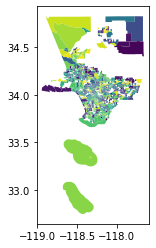

In [81]:
# Quick plot to check that the choropleth works
countGdf.plot(column='Count')

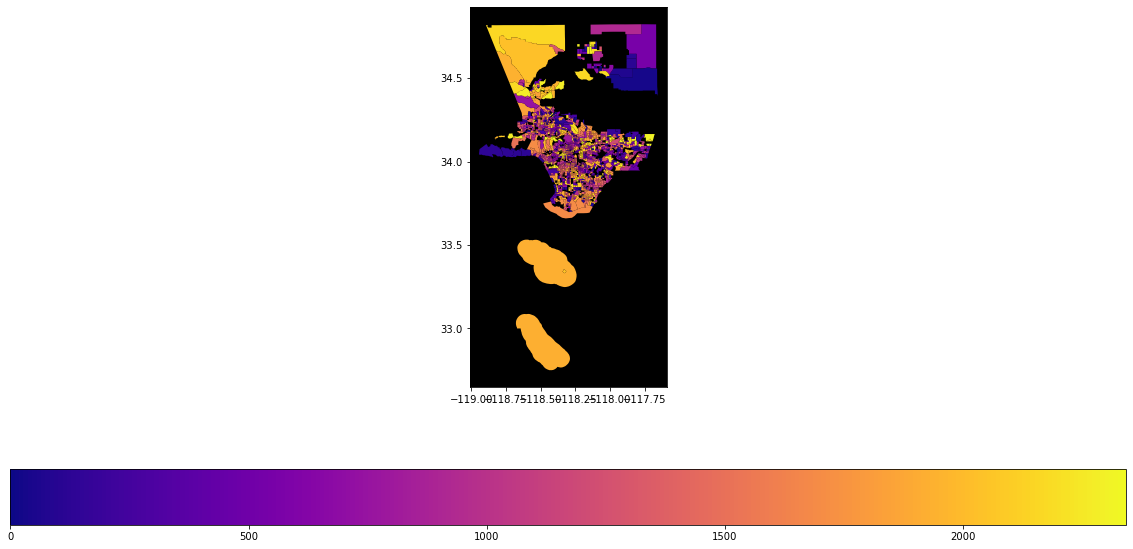

In [82]:
# Plotting with matplotlib

import matplotlib.pyplot as plt 

# create a matplotlib figure and axis object
fig, ax = plt.subplots(1,1,figsize=(20,10))

countGdf.plot('Count', ax=ax, cmap='plasma', legend=True, 
               legend_kwds={'orientation': 'horizontal'})

ax.set_xlim=([-118.721783, -117.201676])
ax.set_ylim=([33.701292, 34.176390])
ax.set_facecolor('k')

In [83]:
# Writing GDF as a json for exporting
import fiona
countGdf.to_file("2020countbytract.geojson", driver='GeoJSON')

/Users/kevin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Using 2019 ACS data

In [84]:
# Using Cenpy this time

import cenpy
from cenpy import products

# create a connection to the American Community Survey
acs = cenpy.products.ACS()

/Users/kevin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/cenpy/remote.py:224: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not "":
/Users/kevin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/cenpy/remote.py:224: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not "":


KeyError: 'Dataset tigerWMS_ACS2017 not found. Please check cenpy.tiger.available()'

In [85]:
# Finding the appropriate total pop table

acs.filter_tables('TOTAL POPULATION', by='description')

,description,columns
table_name,,
B01003,TOTAL POPULATION,[B01003_001E]
B25008,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25008_001E, B25008_002E, B25008_003E]"
B25026,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25026_001E, B25026_002E, B25026_003E, B25026..."
B25033,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25033_001E, B25033_002E, B25033_003E, B25033..."
B98012,TOTAL POPULATION COVERAGE RATE BY SEX,"[B98012_001E, B98012_002E, B98012_003E]"
B98013,TOTAL POPULATION COVERAGE RATE BY WEIGHTING RA...,"[B98013_001E, B98013_002E, B98013_003E, B98013..."


In [86]:
la = products.ACS(2019).from_county('Los Angeles, CA', level='tract',
                                        variables='B01003_001E')

/Users/kevin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/kevin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/kevin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead 

In [87]:
pd.set_option('display.max_columns', None)
la.head()

,GEOID,geometry,B01003_001E,NAME,state,county,tract
0,06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",1759.0,"Census Tract 6704.06, Los Angeles County, Cali...",06,037,670406
1,06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",4278.0,"Census Tract 2948.10, Los Angeles County, Cali...",06,037,294810
2,06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",4134.0,"Census Tract 2948.30, Los Angeles County, Cali...",06,037,294830
3,06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",2986.0,"Census Tract 5765.01, Los Angeles County, Cali...",06,037,576501
4,06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",4070.0,"Census Tract 5768.01, Los Angeles County, Cali...",06,037,576801


In [88]:
# Prepping our tract column for a merge making text similar format as our homeless count data

# Dropping irrelevant columns and rows
la.drop(columns=['GEOID', 'B01003_001E', 'state', 'county', 'tract' ], inplace=True)

# Dropping the geometry column from the houseless count
gdf.drop(columns=['geometry'], inplace=True)

# Making tract text similar format as our homeless count data
la['NAME'] = la['NAME'].str.replace(", Los Angeles County, California","")

# Setting index on tract for both gdf's
la.set_index(['NAME'], inplace=True)
#gdf.set_index(['NAMELSAD10'], inplace=True)

KeyError: "None of ['NAMELSAD10'] are in the columns"

In [90]:
# Joining

joinedGdf = gdf.join(la, how='left')
joinedGdf.head()

,FID_LA_Cou,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,Non-CoC Flag,Non-CoC Place,NAME10,CT_NAME,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,FID_Servic,SPA_NAME,SPA_2012,LACityCD12,LA_CoSupDist11,geometry
NAMELSAD10,,,,,,,,,,,,,,,,,,,,,
Census Tract 1011.10,1463,6,37,101110,6037101110,1,Great LA Continuum of Care,1011.10,Tujunga Canyon Blvd,G5020,S,1142405,0,34.259474,-118.292987,1,SPA 2: San Fernando,2,7.0,5,"POLYGON ((-13169350.790 4063591.830, -13169197..."
Census Tract 1011.22,671,6,37,101122,6037101122,1,Great LA Continuum of Care,1011.22,NaN,G5020,S,2644043,0,34.267721,-118.290147,1,SPA 2: San Fernando,2,7.0,5,"POLYGON ((-13169467.900 4065613.940, -13169463..."
Census Tract 1012.10,1445,6,37,101210,6037101210,1,Great LA Continuum of Care,1012.10,Little Landers Park,G5020,S,650691,0,34.252972,-118.290731,1,SPA 2: San Fernando,2,7.0,5,"POLYGON ((-13169034.650 4063225.630, -13168864..."
Census Tract 1012.20,1703,6,37,101220,6037101220,1,Great LA Continuum of Care,1012.20,Haines Canyon Ave,G5020,S,698967,0,34.251609,-118.281632,1,SPA 2: San Fernando,2,7.0,5,"POLYGON ((-13167528.940 4062726.770, -13167528..."
Census Tract 1013,1578,6,37,101300,6037101300,1,Great LA Continuum of Care,1013.00,Mt. Glesson Ave,G5020,S,2580401,0,34.248778,-118.270999,1,SPA 2: San Fernando,2,7.0,5,"POLYGON ((-13166671.670 4062511.960, -13166671..."


<AxesSubplot:>

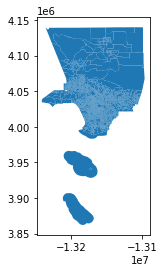

In [92]:
joinedGdf.plot()

In [96]:
joinedGdf.to_crs(epsg='4326', inplace=True)

Well it seems like the issue was the fact that the 2020 ACS had the new census tracts, and the 2020 houseless count used the older tracts.

In [97]:
joinedGdf.to_file("2020countbytract_final.geojson", driver='GeoJSON')